# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## **SUBMISSION**

### **EX - 02.1**

Montecarlo (**MC**) integration is an efficient numerical algorithm to estimate an Integral which uses a pseudo-random number generator. In contrast with some standard quadrature methods which seems more efficient, **MC intgration doesn't depend on the dimensionality of the problem**, and thus it doesn't fail where quadrature methods fail. More than that the estimation **error decreases** as $\frac{1}{\sqrt{N}}$.

If I want to estimate:
$$I=\int_\Omega g(x)p(x)dx$$
where $\int_\Omega p(x)=1$, I can sample $x_i$ from $p(x)$ and then estimate $I$ as:
$$\langle G_M \rangle=\frac{1}{N_{blocks}}\sum_{M=0}^{N_{blocks}}G_M=\frac{1}{N_{blocks}}\sum_{M=0}^{N_{blocks}}\frac{1}{M}\sum_{i=0}^{M}g(x_i)\simeq I$$

This method can be more efficient with **Importance Sampling**: we can divide and multiply for a new function, $d(x)\geq 0$, and sample $x_i$ according to his new *p.d.f.* which is exactly $d(x)$:
$$I=\int_\Omega \frac{g(x)p(x)}{d(x)}d(x)\,dx$$
The estimation of $I$ becomes:
$$I\simeq \frac{1}{N_{blocks}}\sum_{M=0}^{N_{blocks}}\frac{1}{M}\sum_{i=0}^{M}\frac{g(x_i)p(x_i)}{d(x_i)}$$

The choice of $d(x)$ will increase or decrease the error. This can be seen as a variational problem of the variance depending on $d(x)$. The goal is to find the best $d(x)$ in order to obtain the best accuracy and the best precision, which, according to Langrange minimization is the most similar function to $g(x)p(x)$.
For this exercise I chose:
$$d(x)=\frac{2}{\pi}\sin (\frac{\pi}{2}x)$$
So that:
$$\frac{g(x)p(x)}{d(x)}=\frac{1}{\tan(\frac{\pi}{2}x)}$$

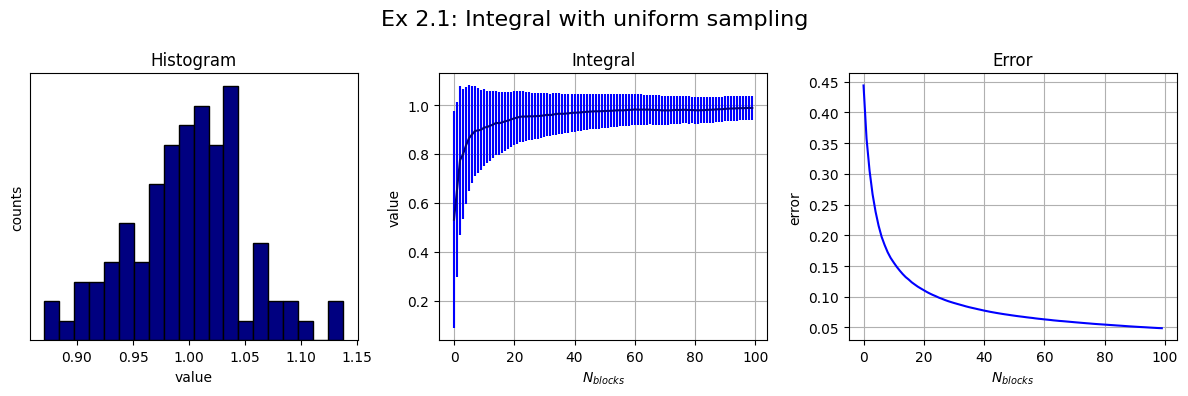

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

risultati=pd.read_csv("risultati_2_1.csv")

fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3,figsize=(12,4))

ax1.hist(risultati['I-value'],bins=20, color='navy',edgecolor='black',density=True)
ax1.set_xlabel(r'value')
ax1.set_ylabel(r'counts')
ax1.set_yticks([])
ax1.grid(False)
ax1.set_title(r"Histogram")

ax2.errorbar(risultati.index.to_numpy(),risultati['I-unif'],yerr=risultati['error'],color='navy',ecolor='blue')
ax2.set_xlabel(r'$N_{blocks}$')
ax2.set_ylabel(r'value')
ax2.grid(True)
ax2.set_title(r"Integral")

ax3.plot(risultati['error'],color='blue')
ax3.set_xlabel(r'$N_{blocks}$')
ax3.set_ylabel(r'error')
ax3.grid(True)
ax3.set_title(r"Error")

fig.suptitle(r"Ex 2.1: Integral with uniform sampling", fontsize=16)
fig.tight_layout()
plt.show()

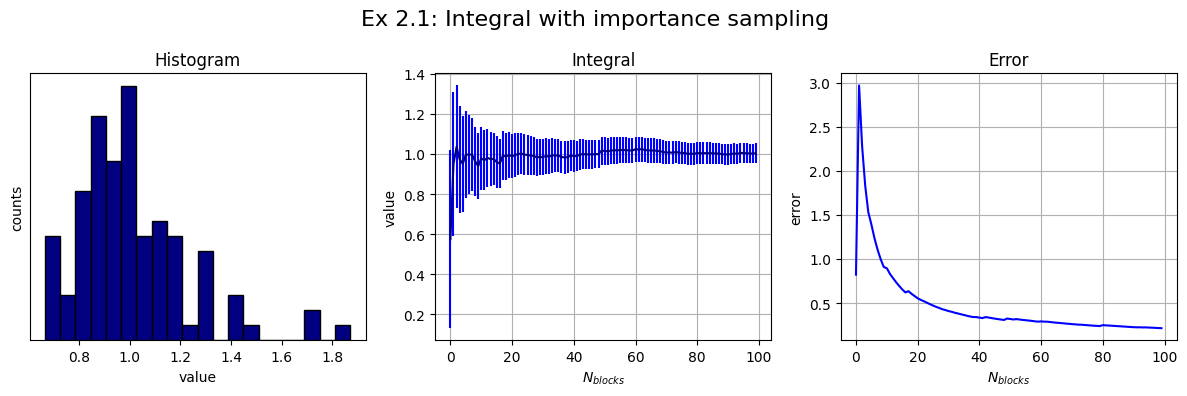

In [2]:
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3,figsize=(12,4))

# Primo subplot
ax1.hist(risultati['I-value-new'],bins=20, color='navy',edgecolor='black',density=True)
ax1.set_xlabel(r'value')
ax1.set_ylabel(r'counts')
ax1.set_yticks([])
ax1.grid(False)
ax1.set_title(r"Histogram")

ax2.errorbar(risultati.index.to_numpy(),risultati['I-im-sampl'],yerr=risultati['error'],color='navy',ecolor='blue')
ax2.set_xlabel(r'$N_{blocks}$')
ax2.set_ylabel(r'value')
ax2.grid(True)
ax2.set_title(r"Integral")

ax3.plot(risultati['error-new'],color='blue')
ax3.set_xlabel(r'$N_{blocks}$')
ax3.set_ylabel(r'error')
ax3.grid(True)
ax3.set_title(r"Error")

fig.suptitle(r"Ex 2.1: Integral with importance sampling", fontsize=16)
fig.tight_layout()
plt.show()

The two figures show that with **importance sampling** the estimation of $I$ is **more accurate and more precise**. Indeed the histogram of $I$ is more peaked around 1 with respect to the one with uniform sampling. As shown in the figures *Integral* and *Error*, the value of $I$ converges quicker at the real value than uniform sampling, and the error is smaller.

### **EX - 02.2**
**1D Random Walk (RW)** is the simplest **Markov Process**: it consist in making a random discrete step (of lenght $a$) forward or backward with equal probability. In the 3 dimensional space is a little bit more complicated because we have to choose the direction of the step. In this case we have to distinguish two cases:
* Discrete lattice: the step of lenght $a$ can be done only in the direction of one of the three axis, randomly chosen.
* Continuous lattice: the step is still fixed of lenght $a$ but we have to sort a solid angle: this will fix the direction of the step.

Random Walks, both in 1D and 3D, are **diffusion processes**, ruled by the **diffusion equation** (a particular case of the *Fokker-Planck* equation):
$$\frac{\partial}{\partial t}p(x,t)=D\frac{\partial^2}{\partial x^2}p(x,t)$$
The solution is a gaussian distribution caraterized by:
* $\langle x(t) \rangle=0$
* $\sigma^2=\langle x^2(t) \rangle=2D\,t\ \ \ \sqrt{\langle x^2(t) \rangle}\sim \sqrt{t}$

If we consider a discrete time and a 3D lattice $\sqrt{\langle |r|^2 \rangle}\sim \sqrt{N_{step}}$

In order to estimate $\sqrt{\langle |r|^2\rangle}$, I created a `c++` code ([es_2_2.cpp](./es_2_2.cpp)), which reads a discrete and continuous RW and computes $\sqrt{\langle |r|^2\rangle}$ with blocking average method. The figures display $\sqrt{\langle |r|^2\rangle}$ as a function of the step and it is compatible with the power-law function described above. Two examples of discrete and continuous RW are shown in the last column.

I created $10^4$ different trajectories both for discrete and continuous RW. In order to fo this I created two `c++` codes: [generate_rws.cpp](./generate_rws.cpp) (discrete) and [generate_rws_c.cpp](./generate_rws_c.cpp) (continuous). For the positions I used my class `posizione.cpp`.
Here is shown the code I used for the discrete trajectories ($a=1$):
```cpp
for(int j=1; j<=n_steps; j++){
    //...
    appo=rnd.Rannyu();
    appo1=rnd.Rannyu();

    if(appo1>=0.5){
        appo1=1; //step forward
    }
    if(appo1<0.5){
        appo1=-1; //step backward
    }
    //sorting the step direction
    if(static_cast<int>(appo*3)==0){
        pos.push_back(posizione((pos[j-1].GetX()+appo1),pos[j-1].GetY(),pos[j-1].GetZ()));
    }
    if(static_cast<int>(appo*3)==1){
        pos.push_back(posizione(pos[j-1].GetX(),(pos[j-1].GetY()+appo1),pos[j-1].GetZ()));
    }
    if(static_cast<int>(appo*3)==2){
        pos.push_back(posizione(pos[j-1].GetX(),pos[j-1].GetY(),(pos[j-1].GetZ()+appo1)));
    }
    //...
```
For the continuous trajectories I had to sort a solid angle on a sphere of radius $a=1$. Here is shown the code:
```cpp
for(int j=1; j<=n_steps; j++){
    //...
    appo=rnd.Rannyu();
    appo1=rnd.Rannyu();

    double theta=0;
    double phi=0;

    //sorting solid angle
    theta=2*M_PI*appo;
    phi=acos(1-2*appo1); //Respect the transformation rules

    pos.push_back(posizione((pos[j-1].GetX()+sin(phi)*cos(theta)),(pos[j-1].GetY()+sin(phi)*sin(theta)),(pos[j-1].GetZ()+cos(phi))));
    //...
```

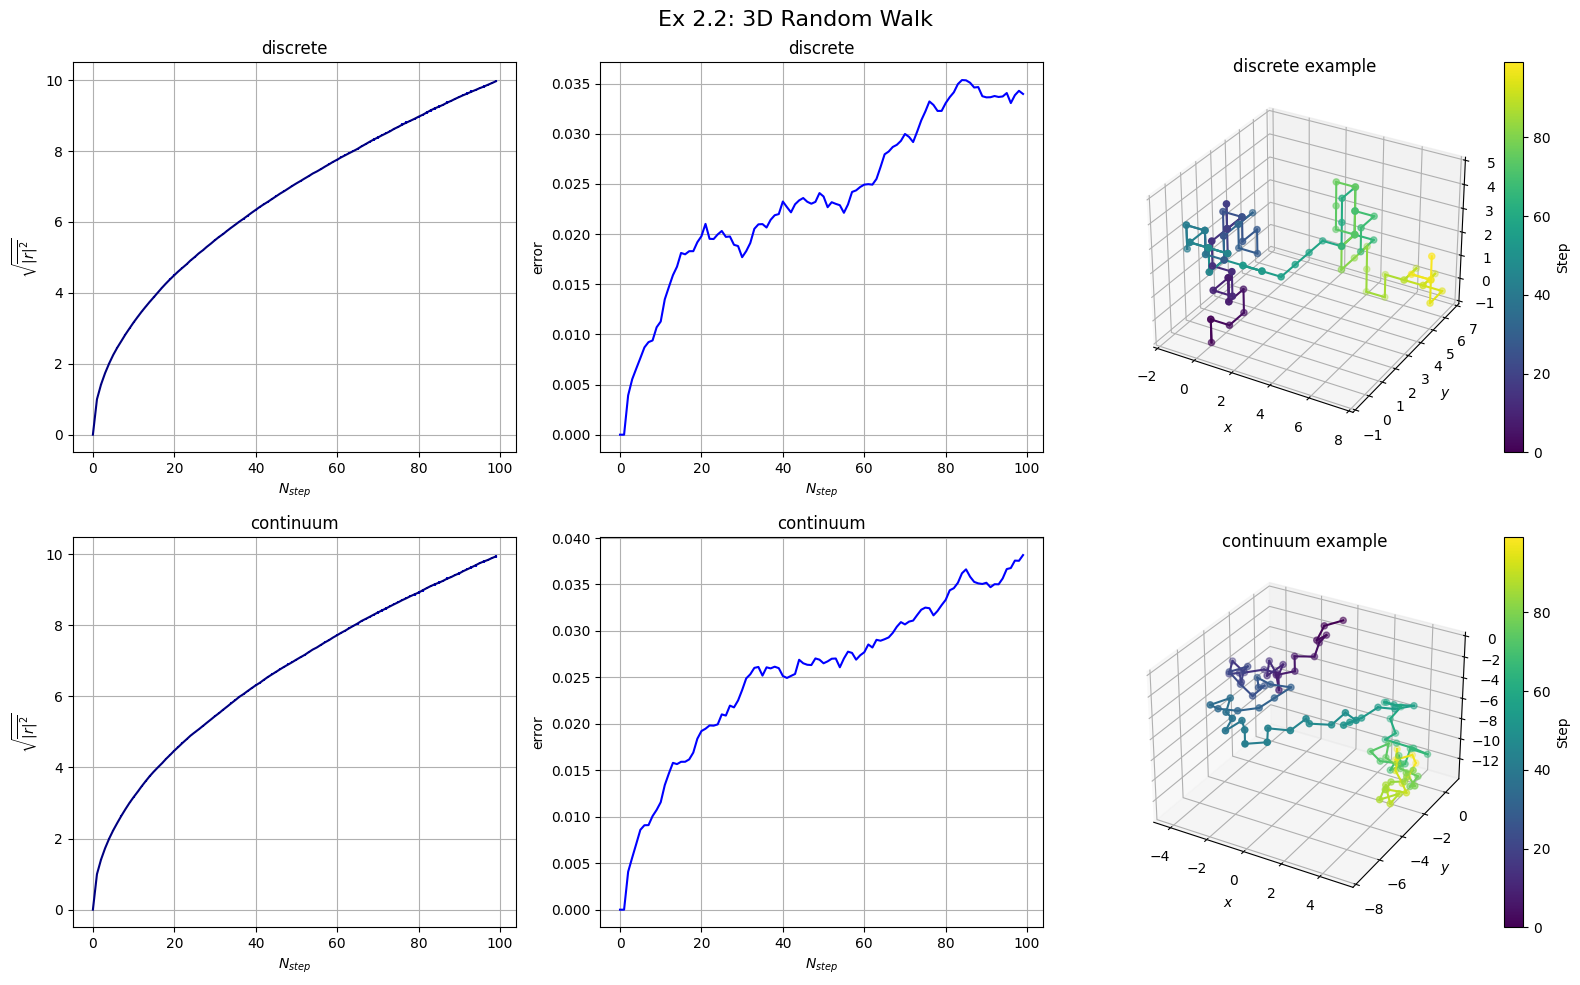

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize

df = pd.read_csv("risultati_2_2.csv")
df2 = pd.read_csv("risultati_2_2_con.csv")
df_traj = pd.read_csv("trajectories.csv")
df2_traj = pd.read_csv("trajectories_cont.csv")

num_traj=4

fig = plt.figure(figsize=(16, 10)) 

ax1 = fig.add_subplot(2, 3, 1)
ax1.errorbar(df.index.to_numpy(), df['rw'], yerr=df['err'], color='navy', ecolor='blue')
ax1.set_xlabel(r'$N_{step}$')
ax1.set_ylabel(r'$\sqrt{\overline{|r|^2}}$')
ax1.set_title(r'discrete')
ax1.grid(True)

ax2=fig.add_subplot(2,3,2)
ax2.plot(df['err'],c='blue')
ax2.set_xlabel(r'$N_{step}$')
ax2.set_ylabel(r'error')
ax2.set_title(r'discrete')
ax2.grid(True)

ax3 = fig.add_subplot(2, 3, 3, projection='3d')
norm = Normalize(vmin=0, vmax=99)
cmap = cm.viridis
indices = np.arange(100)
sc = ax3.scatter(df_traj['x'][100*num_traj:100*num_traj+100], df_traj['y'][100*num_traj:100*num_traj+100], df_traj['z'][100*num_traj:100*num_traj+100], c=indices, cmap=cmap, norm=norm)
j=0
for i in range(100*num_traj,100*num_traj+99):
    ax3.plot(df_traj['x'][i:i+2], df_traj['y'][i:i+2], df_traj['z'][i:i+2], color=cm.viridis(norm(j)), linestyle='-')
    j+=1
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.set_zlabel(r'$z$')
ax3.set_title(r'discrete example')
ax3.grid(True)

ax3.set_xlim([df_traj['x'][100*num_traj:100*num_traj+100].min(), df_traj['x'][100*num_traj:100*num_traj+100].max()])
ax3.set_ylim([df_traj['y'][100*num_traj:100*num_traj+100].min(), df_traj['y'][100*num_traj:100*num_traj+100].max()])
ax3.set_zlim([df_traj['z'][100*num_traj:100*num_traj+100].min(), df_traj['z'][100*num_traj:100*num_traj+100].max()])

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax3)
cbar.set_label(r'Step')

ax4 = fig.add_subplot(2, 3, 4)
ax4.errorbar(df2.index.to_numpy(), df2['rw'], yerr=df2['err'], color='navy', ecolor='blue')
ax4.set_xlabel(r'$N_{step}$')
ax4.set_ylabel(r'$\sqrt{\overline{|r|^2}}$')
ax4.set_title(r'continuum')
ax4.grid(True)

ax5=fig.add_subplot(2,3,5)
ax5.plot(df2['err'],c='blue')
ax5.set_xlabel(r'$N_{step}$')
ax5.set_ylabel(r'error')
ax5.set_title(r'continuum')
ax5.grid(True)

ax6 = fig.add_subplot(2, 3, 6, projection='3d')
norm = Normalize(vmin=0, vmax=99)
cmap = cm.viridis
indices = np.arange(100)
sc = ax6.scatter(df2_traj['x'][100*num_traj:100*num_traj+100], df2_traj['y'][100*num_traj:100*num_traj+100], df2_traj['z'][100*num_traj:100*num_traj+100], c=indices, cmap=cmap, norm=norm)
k=0
for i in range(100*num_traj,100*num_traj+99):
    ax6.plot(df2_traj['x'][i:i+2], df2_traj['y'][i:i+2], df2_traj['z'][i:i+2], color=cm.viridis(norm(k)), linestyle='-')
    k+=1
ax6.set_xlabel(r'$x$')
ax6.set_ylabel(r'$y$')
ax6.set_zlabel(r'$z$')
ax6.set_title(r'continuum example')
ax6.grid(True)

ax6.set_xlim([df2_traj['x'][100*num_traj:100*num_traj+100].min(), df2_traj['x'][100*num_traj:100*num_traj+100].max()])
ax6.set_ylim([df2_traj['y'][100*num_traj:100*num_traj+100].min(), df2_traj['y'][100*num_traj:100*num_traj+100].max()])
ax6.set_zlim([df2_traj['z'][100*num_traj:100*num_traj+100].min(), df2_traj['z'][100*num_traj:100*num_traj+100].max()])

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax6)
cbar.set_label(r'Step')

fig.suptitle(r"Ex 2.2: 3D Random Walk", fontsize=16)
plt.tight_layout()
plt.show()

